In [3]:
#Importing necessary libraries
import pandas as pd
import math
import seaborn as sns

# pre-processing of text
import string
import re
import nltk
import chardet
import numpy as np

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time
import nltk

from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [ ]:
df = pd.read_csv("reduced_dataset-release.csv")

C:\Users\xben4\AppData\Local\Temp\ipykernel_33156\1102548668.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("reduced_dataset-release.csv")


# 1.Data Cleaning

### 1.1.Data Overview

In [ ]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,@amazon,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1,0.0,@PayPal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D     85171 non-null   float64
 11  VOLATILITY_30D     85165 non-null   float64
 12  LSTM_POLARITY      85175 non-null   object 
 13  TEXTBLOB_POLARITY  45594 non-null   object 
 14  MENTION            27073 non-null   object 
dtypes: float64(8), object(7)
memory usage: 16.4+ MB


In [ ]:
df.isna().sum()

Unnamed: 0            18521
TWEET                     3
STOCK                 58106
DATE                  58106
LAST_PRICE            58106
1_DAY_RETURN          58106
2_DAY_RETURN          58106
3_DAY_RETURN          58106
7_DAY_RETURN          58106
PX_VOLUME             58106
VOLATILITY_10D        58111
VOLATILITY_30D        58117
LSTM_POLARITY         58107
TEXTBLOB_POLARITY     97688
MENTION              116209
dtype: int64

Therefore, there are 143281 records in this dataset. However, most of the columns contain a large number of null values. The `MENTION` colulmn even has 116209 null values. Therefore, we need to perform data structure rearrangement to ensure that each value in a record matches its corresponding column.

### 1.2.Data Structure Overview

In order to know the distribution of each type of misarrangement, we need to have a look at the number of null values of each record. 

In [ ]:
isna_list = []
for i in range(len(df)):
    isna_list.append(df.iloc[i].isna().sum())
pd.Series(isna_list).unique()

array([13,  2,  0,  3,  1, 14], dtype=int64)

Therefore, there are mainly six types of missing value issues among the dataset. We first look into the case where there is no null values in the record.

#### 1.2.1 Case 1: # of missing values = 0

In [ ]:
for j in range(len(isna_list)):
    if isna_list[j] == 0: # When # of missing values is 0
        print(j)

2
3
4
11
20
23
26
35
48
53
54
57
62
63
66
69
70
73
94
97
98
121
122
123
126
133
136
139
160
163
176
181
184
191
194
201
210
225
238
243
244
249
250
253
258
263
272
275
280
285
288
289
290
293
300
303
306
307
308
309
312
313
314
317
320
323
340
345
348
357
374
389
390
401
410
411
416
431
432
433
434
435
440
441
444
445
456
457
458
461
466
487
490
495
504
511
512
513
518
519
520
527
528
547
548
551
552
559
566
581
586
587
588
589
592
603
614
615
616
621
622
625
632
639
644
657
658
659
681
686
687
688
697
700
707
710
713
714
749
754
763
766
767
768
773
774
777
780
783
784
787
794
805
814
831
832
833
844
847
850
855
856
857
864
867
870
873
874
879
880
885
892
903
904
915
924
929
932
937
944
945
948
961
962
965
970
973
974
1001
1002
1005
1006
1009
1010
1011
1012
1023
1026
1027
1036
1041
1042
1049
1052
1053
1056
1057
1060
1063
1070
1075
1078
1079
1080
1081
1082
1083
1084
1089
1092
1101
1102
1103
1106
1107
1108
1109
1110
1111
1112
1115
1126
1127
1128
1131
1144
1167
1186
1189
1190
1193
1196
12

In [ ]:
df.iloc[2:5, :]

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal


Case 1: No null values in the row:
This type of records needs no adjustment. Thus, we keep them unchanged during data cleaning.

#### 1.2.2 Case 2: # of missing values = 1

In [ ]:
for j in range(len(isna_list)):
    if isna_list[j] == 1: # When # of missing values is 1
        print(j)

674
3320
4147
5493
5738
5888
5933
6011
6561


In [ ]:
df.iloc[674, :]

Unnamed: 0                                                         401
TWEET                RT @IonicMaterials: "Imagine: Three days of li...
STOCK                                                            Yahoo
DATE                                                        31/01/2017
LAST_PRICE                                                        4.21
1_DAY_RETURN                                                       0.0
2_DAY_RETURN                                                 -0.104513
3_DAY_RETURN                                                 -0.104513
7_DAY_RETURN                                                 -0.104513
PX_VOLUME                                                       3000.0
VOLATILITY_10D                                                  85.122
VOLATILITY_30D                                                     NaN
LSTM_POLARITY                                                        1
TEXTBLOB_POLARITY                                 -0.16666666666666666
MENTIO

Case 2: The rows with 1 missing value do not have misarrangement issues but simply null value issue. We also keep them unchanged until we finish rearranging the data structure.

#### 1.2.3 Case 3&4: # of missing values = 2 or 3

In [ ]:
for j in range(len(isna_list)):
    if isna_list[j] == 2 or isna_list[j] == 3: # When # of missing values is 2 or 3
        print(j)

1
6
8
10
13
15
17
19
22
25
28
30
32
34
37
39
41
43
45
47
50
52
56
59
61
65
68
72
75
77
79
81
83
85
87
89
91
93
96
100
102
104
106
108
110
112
114
116
118
120
125
128
130
132
135
138
141
143
145
147
149
151
153
155
157
159
162
165
167
169
171
173
175
178
180
183
186
188
190
193
196
198
200
203
205
207
209
212
214
216
218
220
222
224
227
229
231
233
235
237
240
242
246
248
252
255
257
260
262
265
267
269
271
274
277
279
282
284
287
292
295
297
299
302
305
311
316
319
322
325
327
329
331
333
335
337
339
342
344
347
350
352
354
356
359
361
363
365
367
369
371
373
376
378
380
382
384
386
388
392
394
396
398
400
403
405
407
409
413
415
418
420
422
424
426
428
430
437
439
443
447
449
451
453
455
460
463
465
468
470
472
474
476
478
480
482
484
486
489
492
494
497
499
501
503
506
508
510
515
517
522
524
526
530
532
534
536
538
540
542
544
546
550
554
556
558
561
563
565
568
570
572
574
576
578
580
583
585
591
594
596
598
600
602
605
607
609
611
613
618
620
624
627
629
631
634
636
638
641
643
64

In [ ]:
df.iloc[6:11]

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
6,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon,NaN
7,5,RT @Disney: See The Newest Trailer for #Beauty...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Disney,31/01/2017,110.65,0.002621,-0.012201,-0.012201,-0.024853,8485838.0,12.229,12.982,1.0,0.0,@Disney,NaN
9,6,RT @tarastrong: Just got @facebook back! I REA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,Facebook,31/01/2017,130.32,0.005064,0.014273,0.014273,-0.007290,19790484.0,15.121,16.219,1.0,0.0,@facebook,NaN


This is the most popular case of missing data. In the first row, 'Amazon' which is supposed to be in the `STOCK` column was assigned to the `TWEET` column, leading to null values in the `Unnamed: 0` column and the `MENTION` column. To rearrange this type of records, we need to extract the values and assign them to the right columns in a new dataset.

#### 1.2.4 Case 5&6: # of missing values = 13 or 14

In [ ]:
df.iloc[0]

Unnamed: 0                                                           0
TWEET                RT @robertoglezcano: @amazon  #Patents Show Fl...
STOCK                                                              NaN
DATE                                                               NaN
LAST_PRICE                                                         NaN
1_DAY_RETURN                                                       NaN
2_DAY_RETURN                                                       NaN
3_DAY_RETURN                                                       NaN
7_DAY_RETURN                                                       NaN
PX_VOLUME                                                          NaN
VOLATILITY_10D                                                     NaN
VOLATILITY_30D                                                     NaN
LSTM_POLARITY                                                      NaN
TEXTBLOB_POLARITY                                                  NaN
MENTIO

This is also the most common case of missing data issue. Only two columns, `Unnamed: 0` and `TWEET` contains values while others are all nulls. This is because the the original complete records were splitted into two different rows in this dataset. Therefore, we need to concat these rows to restore the complete data records. Since there are 15 columns in the dataset, we only need to concat the rows with missing values of 13 with the rows with missing values of 2, and the rows with missing values of 14 with missing values of 1, to restore the original data records.

### 1.3.Reorganizing the data and transforming them into a new dataset

In [ ]:
# Rearrange column name
col_list = df.columns[1:].tolist()

In [ ]:
# Input values to the corresponding columns of the new dataset
def data_cleaning(df):
    df_adjusted = pd.DataFrame() ## Create a new dataset
    for i in range(len(df)):
        if df.iloc[i].isna().sum() <= 3 and df.iloc[i].isna().sum() > 1: # Extract values from rows with 2 or 3 missing values
            if df.iloc[i, 0] is np.nan: # If the value in 'Unnamed: 0' is null, extract the values after column 'TWEET'
                list_1 = df.iloc[i, 1:14].tolist()
                list_1.insert(0, df.iloc[i-1]['TWEET'])
                df_dict1 = {col:con for col, con in zip(col_list, list_1)}
                df3 = pd.DataFrame(df_dict1, index = [i-1])
                df_adjusted = pd.concat([df_adjusted, df3], axis = 0)
            else:
                list_2 = df.iloc[i, 0:13].tolist() # If 'Unnamed: 0' is not null, extract all the values after it except the last column
                list_2.insert(0, df.iloc[i-1]['TWEET'])
                df_dict2 = {col:con for col, con in zip(col_list, list_2)}
                df4 = pd.DataFrame(df_dict2, index = [i-1])
                df_adjusted = pd.concat([df_adjusted, df4], axis = 0)
        elif df.iloc[i].isna().sum() <= 1:                               # Keep the rows with less than 1 null value
            list_3 = df.iloc[i, 1:].tolist()
            df_dict3 = {col:con for col, con in zip(col_list, list_3)}
            df5 = pd.DataFrame(df_dict3, index = [i])
            df_adjusted = pd.concat([df_adjusted, df5], axis = 0)
    return df_adjusted

In [ ]:
df_adjusted = data_cleaning(df)

In [ ]:
df_adjusted.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,0.0,@amazon
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
5,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,0.8,@amazon


### 1.4.Missing values in the adjusted dataset

#### 1.4.1.Missing values in the `TWEET` column

In [ ]:
df_adjusted.isna().sum()

TWEET                 3
STOCK                 0
DATE                  0
LAST_PRICE            0
1_DAY_RETURN          0
2_DAY_RETURN          0
3_DAY_RETURN          0
7_DAY_RETURN          0
PX_VOLUME             0
VOLATILITY_10D        0
VOLATILITY_30D       14
LSTM_POLARITY         0
TEXTBLOB_POLARITY     3
MENTION               0
dtype: int64

However, we still have 3 missing tweets in the adjusted dataset. It might happen when there are some rare misarrangemnet issues that we did not take into our data cleaning consideration. Hence, we need to look up to the original dataset to fill these null values.

In [ ]:
df_adjusted[df_adjusted['TWEET'].isna() == True]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
22894,NaN,Groupon,31/08/2017,4.44,-0.036036,-0.033784,-0.067568,-0.081081,10787716.0,26.475,39.376,1.0,0.0,@Groupon
23091,NaN,Groupon,31/08/2017,4.44,-0.036036,-0.033784,-0.067568,-0.081081,10787716.0,26.475,39.376,1.0,0.0,@Groupon
125269,NaN,salesforce.com,25/09/2018,158.87,-0.0005665009126959364,-0.021086,-0.021086,-0.018065,5699599.0,23.658,20.970,1.0,0.75,@salesforce


For example, the reason that null values still exist is that we only concat the rows where tweets are in the `TWEET` column. However, in this case, some of the tweet values in the original dataset was mistyped into the `Unnamed: 0` column. Hence, we need to adjust these missing values manually.

#### 1.4.2.Missing values in the `VOLATILITY_30D` column


In [ ]:
df_adjusted[df_adjusted['VOLATILITY_30D'].isna() == True]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
539,RT @PeacePlace4Kids: So glad to be included in...,Yahoo,31/01/2017,4.21,0.0,-0.104513,-0.104513,-0.104513,3000.0,85.122,NaN,1.0,0.5,@Yahoo
674,"RT @IonicMaterials: ""Imagine: Three days of li...",Yahoo,31/01/2017,4.21,0.0,-0.104513,-0.104513,-0.104513,3000.0,85.122,NaN,1,-0.16666666666666666,@Yahoo
2704,Marriott CEO discusses how Trump's win could a...,Yahoo,31/01/2017,4.21,0.0,-0.104513,-0.104513,-0.104513,3000.0,85.122,NaN,-1.0,1.0,@Yahoo
3320,RT @svo916: @Yahoo pls pull your ad from Breit...,Yahoo,01/02/2017,4.21,0.0,0.000000,-0.104513,-0.104513,3000.0,85.122,NaN,-1,0.0,@Yahoo
4147,RT @svo916: @Yahoo pls pull your ad from Breit...,Yahoo,01/02/2017,4.21,0.0,0.000000,-0.104513,-0.104513,3000.0,85.122,NaN,-1,0.0,@Yahoo
5493,RT @QLIRehab: And HUGE congratulations to our ...,Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,1,0.4000000000000001,@Yahoo
5738,"RT @JamesOKeefeIII: ICYMI, @Project_Veritas ha...",Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,-1,-0.6,@Yahoo
5745,@JamesOKeefeIII @Project_Veritas @CNN @Yahoo h...,Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,1.0,0.0,@Yahoo
5888,RT @JustMy_NameHere: Thank you @JamesOKeefeIII...,Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,-1,-1.0,@Yahoo
5933,"RT @JamesOKeefeIII: ICYMI, @Project_Veritas ha...",Yahoo,28/02/2017,4.6,0.0,0.000000,0.000000,-0.013043,425.0,92.245,NaN,-1,-0.6,@Yahoo


Therefore, the missing values in the `VOLATILITY_30D` column is due to the incomplete Yahoo's financial data. Since there are only 14 null values for the company, we can simply drop them in our analysis.

#### 1.4.3.Missing values in the `TEXTBLOB_POLARITY` column

In [ ]:
df_adjusted[df_adjusted['TEXTBLOB_POLARITY'].isna() == True]

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
29833,@TMobile #thankenstein#contest https://t.co/uJ...,TMobile,31/10/2017,59.77,-0.003179,0.053204,0.053204,0.041994,7361313.0,37.661,22.426,-1.0,NaN,@TMobile
61164,@TMobile #Thankenstien#contest,TMobile,30/10/2018,63.92,0.015488110137672009,0.018617,0.018617,0.083855,6077259.0,31.447,25.518,-1.0,NaN,@TMobile
125612,@reeses @amazon #NOTSORRY#SWEEPSTAKES,Amazon,25/09/2018,1974.55,-0.020354004709933936,-0.030154,-0.030154,-0.016966,4538407.0,27.407,23.156,1.0,NaN,@amazon


The `TEXTBLOB_POLARITY` column contains labeled sentiment from TextBlob, a popular python Library for NLP. For now, we do not need this column for analysis. So we can drop the whole column.

#### 1.4.4.Adjust all the missing values int the new dataset

In [ ]:
def adjust_values(cleaned, original):
    cleaned2 = cleaned.copy()
    cleaned2.loc[22894, 'TWEET'] = original.iloc[22894, 0]
    cleaned2.loc[23091, 'TWEET'] = original.iloc[23091, 0]
    cleaned2.loc[125269,'TWEET'] = original.iloc[125269,0]
    cleaned2 = cleaned2.drop(columns='TEXTBLOB_POLARITY')
    cleaned2 = cleaned2.dropna(how='any')
    cleaned_reset = cleaned2.reset_index().iloc[:,1:]
    return cleaned_reset

In [ ]:
df_tweet = adjust_values(df_adjusted, df)

In [ ]:
df_tweet.isna().sum()

TWEET             0
STOCK             0
DATE              0
LAST_PRICE        0
1_DAY_RETURN      0
2_DAY_RETURN      0
3_DAY_RETURN      0
7_DAY_RETURN      0
PX_VOLUME         0
VOLATILITY_10D    0
VOLATILITY_30D    0
LSTM_POLARITY     0
MENTION           0
dtype: int64

Up to now, we have cleaned all of the null values from the original dataset and rearranged the data structure.

### 1.5.Duplicates & Outliers

#### 1.5.1.Duplicates

In [ ]:
bool_series = df_tweet.duplicated()

In [ ]:
true_count = 0
for boo in bool_series:
    if boo == True:
        true_count+=1
true_count

19496

Therefore, there are 19464 duplicates in the new dataset. We shall drop these duplicates to avoid data redundancy.

In [ ]:
df_drop_dup = df_tweet[-df_tweet.duplicated()]

In [ ]:
df_drop_dup

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,@PayPal
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,@PayPal
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,@PayPal
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85157,RT @Kenneth00542118: Just saw this on Amazon: ...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85158,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1,@amazon
85159,https://t.co/IsS8FGekqH: New Releases - Amazon...,Amazon,30/09/2018,2003.0,0.0,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85160,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.0,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1,@Google


#### 1.5.2 Outliers & Distributions

In [ ]:
numeric_cols = df_drop_dup.columns.drop(['TWEET','STOCK','DATE','MENTION']).tolist()

In [ ]:
numeric_cols

['LAST_PRICE',
 '1_DAY_RETURN',
 '2_DAY_RETURN',
 '3_DAY_RETURN',
 '7_DAY_RETURN',
 'PX_VOLUME',
 'VOLATILITY_10D',
 'VOLATILITY_30D',
 'LSTM_POLARITY']

In [ ]:
df_drop_dup.loc[:,numeric_cols] =  df_drop_dup.loc[:, numeric_cols].apply(lambda x: x.astype(float)) # Converting str into float
df_drop_dup

C:\Users\xben4\AppData\Local\Temp\ipykernel_33156\1359319864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_dup.loc[:,numeric_cols] =  df_drop_dup.loc[:, numeric_cols].apply(lambda x: x.astype(float)) # Converting str into float


,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,@PayPal
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85157,RT @Kenneth00542118: Just saw this on Amazon: ...,Amazon,30/09/2018,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85158,RT @JanetCBrennan: OUT NOW!\r\r\r\r\r\r\nBarne...,Amazon,30/09/2018,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85159,https://t.co/IsS8FGekqH: New Releases - Amazon...,Amazon,30/09/2018,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0,@amazon
85160,RT @Google: With hands-free ordering from your...,Google,30/09/2018,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1.0,@Google


In [ ]:
df_col = df_drop_dup.drop(columns = ['TWEET','STOCK','DATE','MENTION'])
df_col

,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY
0,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0
1,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0
2,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0
3,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0
4,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0
...,...,...,...,...,...,...,...,...,...
85157,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0
85158,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0
85159,2003.00,0.000000,0.000000,0.004983,-0.043929,4085135.0,20.709,22.946,1.0
85160,1207.08,0.000000,0.000000,0.000232,-0.028962,1780759.0,15.005,17.588,1.0


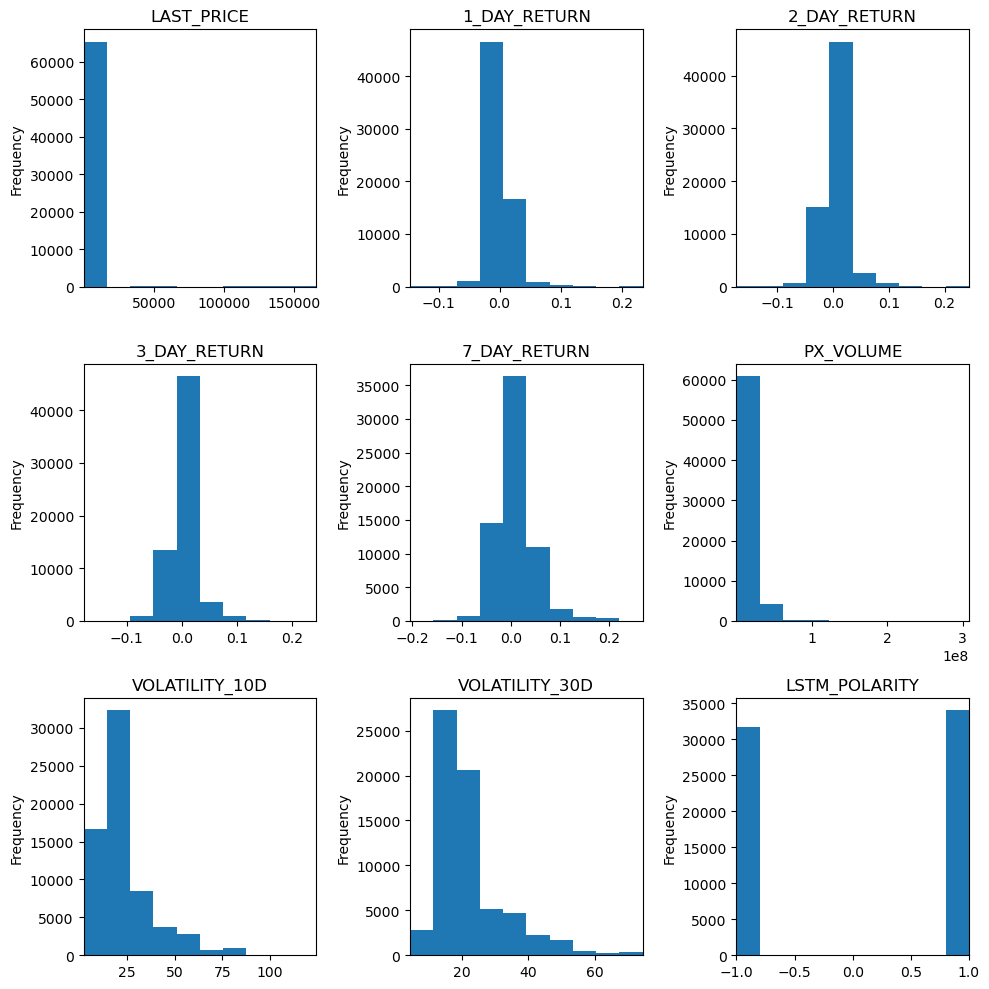

In [ ]:
n_bins = 10
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes_flat = axes.flatten()

for i, (col_name, ax) in enumerate(zip(df_col.columns, axes_flat)):
    # calculate bin size based on range of column
    col_range = df_col[col_name].max() - df_col[col_name].min()
    bin_size = col_range / n_bins
    
    # create histogram with dynamic bin size
    df_col[col_name].plot(kind='hist', bins = n_bins, ax=ax)
    
    # set x-axis limit based on range of column
    ax.set_xlim(df_col[col_name].min(), df_col[col_name].max())
    
    ax.set_title(col_name)

plt.tight_layout()
plt.show()

In [ ]:
df_drop_dup.to_csv('cleaned_data.csv')

So far, the columns with numeric values are balanced in terms of the distribution. Hence, there is no outliers or noncorresponding data in the new dataset. We have finished out data cleaning process in this part.

## 2.Exploratory Data Analysis

### 2.1.Study the relationship betewen the number of tweets a company receives and its impact on stock price change.

In [6]:
df = pd.read_csv("cleaned_data.csv").drop(columns = 'Unnamed: 0')

In [ ]:
def epa1(stk):
    ret_list = ['1_DAY_RETURN','2_DAY_RETURN','3_DAY_RETURN','7_DAY_RETURN']
    company = df[df["STOCK"] == stk]
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    axs = axs.ravel()
    for i, ret in enumerate(ret_list):
        result = company.groupby('DATE').agg({'TWEET':'count',ret:'unique'})
        axs[i].scatter(result['TWEET'], result[ret])
        axs[i].set_title(f"Scatter plot for {ret}")
        axs[i].set_xlabel("Number of tweet")
        axs[i].set_ylabel(ret)
        axs[i].grid()
        axs[i].set_alpha(0.5)
    fig.set_facecolor('#EAEAF2')
    plt.tight_layout()
    plt.show()
    

In [ ]:
df['STOCK'].unique()

array(['Amazon', 'PayPal', 'Disney', 'Facebook', 'Starbucks', 'eBay',
       'Reuters', 'CBS', 'Netflix', 'Apple', 'Deutsche Bank', 'Pepsi',
       'Google', 'HSBC', 'Ford', 'Morgan Stanley', "McDonald's", 'Tesco',
       'easyJet', 'General Electric', 'Adobe', 'Microsoft', 'Burberry',
       'Ryanair', 'FedEx', 'HP', 'BP', 'Bayer', 'IBM', 'Oracle', 'Nike',
       'Cisco', 'Visa', 'Goldman Sachs', 'Volkswagen', 'American Express',
       'Exxon', 'Wells Fargo', 'Audi', 'BMW', 'John Deere', "L'Oreal",
       'Kroger', 'AT&T', 'Hyundai', 'salesforce.com', 'Toyota',
       'Citigroup', 'SAP', 'H&M', 'Shell', 'Walmart', 'Sony', 'Chevron',
       'Honda', 'ASOS', 'Home Depot', 'Nissan', 'Next', 'Pfizer',
       'Verizon', 'Boeing', 'Gillette', 'Intel', 'TMobile', 'Comcast',
       'Expedia', 'Nestle', 'Bank of America', 'adidas', 'TripAdvisor',
       'CocaCola', 'Thales', 'UPS', '21CF', 'BlackRock', 'Mastercard',
       "Kellogg's", 'Samsung', 'JPMorgan', 'Heineken', 'GSK', 'Allianz',
    

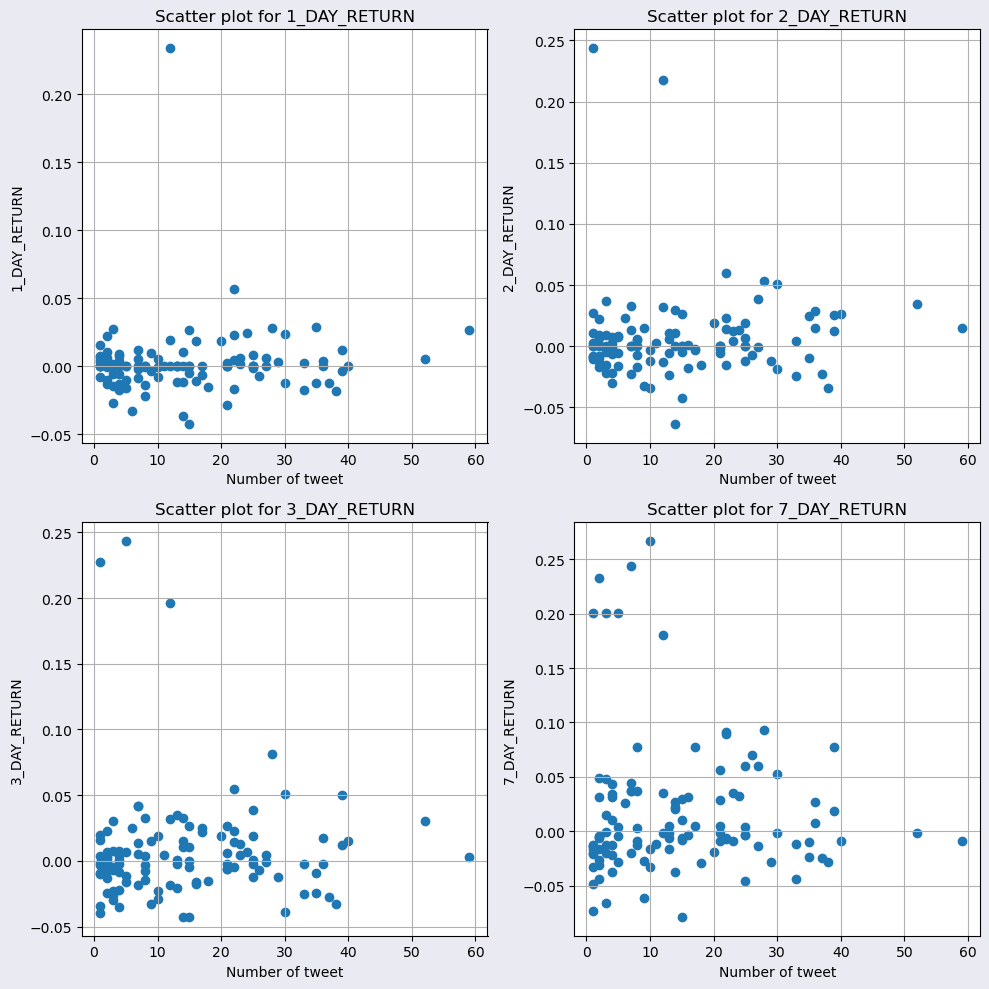

In [ ]:
epa1('Facebook')

# Text Analysis

In [4]:
df.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,MENTION
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,1.0,@amazon
1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1.0,@PayPal
3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.78,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1.0,@PayPal
4,RT @loadsofvans: Retweet this post &amp; follo...,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1.0,@amazon


In [7]:
#Only focusing on tweet and sentiment column for our excercise
df = df.iloc[:, [0,11]]
df.head()

,TWEET,LSTM_POLARITY
0,RT @robertoglezcano: @amazon #Patents Show Fl...,1.0
1,@FAME95FM1 Jamaicans make money with @Payoneer...,-1.0
2,@CBSi Jamaicans make money with @Payoneer @Pay...,1.0
3,@Hitz92fm Jamaicans make money with @Payoneer ...,-1.0
4,RT @loadsofvans: Retweet this post &amp; follo...,-1.0


# Text Pre-Processing

We are going to perform below data pre-processing operations on the tweet data stored in OriginalTweet column:

- Remove URLs, hashtags and mentions@
- Remove digits
- Remove the punctuation
- Tokenization
- Remove stop words
- Lemmatize/Stem

In [63]:
#Pre-Processing function to lowercase, remove punctuations, tokenize, remove stopwords and lemmatize.
stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc): # doc is a string of text
    # Remove URLs
    doc = re.sub(r'http\S+', '', doc)
    # Remove hashtags
    doc = re.sub(r'#\w+', '', doc)
    # Remove mentions
    doc = re.sub(r'@\w+', '', doc)
    # Replace line breaks with spaces
    doc = doc.replace("</br>", " ")
    # Remove punctuation and digits
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Tokenize text
    tokens = word_tokenize(doc)
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords]
    # Lemmatize tokens
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    # Join lemmatized tokens into a string
    doc = " ".join(lemmatized)
    # Correct spelling
    # blob = TextBlob(doc)
    #doc = str(blob.correct())
    return doc

# Modelling

We will go through the following steps:

1. Split the data into training and test sets (75% train, 25% test)
2. Extract features from the training data using CountVectorizer, which is a bag of words feature implementation. We will use the pre-processing function above in conjunction with Count Vectorizer
3. Transform the test data into the same feature vector as the training data.
4. Train the classifier
5. Evaluate the classifier

In [29]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = df['TWEET'] # the column text contains textual data to extract features from
y = df['LSTM_POLARITY'] # this is the column we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(65666,) (65666,)
(49249,) (49249,)
(16417,) (16417,)


In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xben4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xben4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\xben4\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [107]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(49249, 49784) (16417, 49784)


# a) Naive Bayes Classifier

In [94]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 22.9 ms, sys: 1.98 ms, total: 24.9 ms
Wall time: 33.4 ms


Accuracy:  0.6535298775659377
Recall: 0.7305198632559237
F1 score: 0.6854330273199868


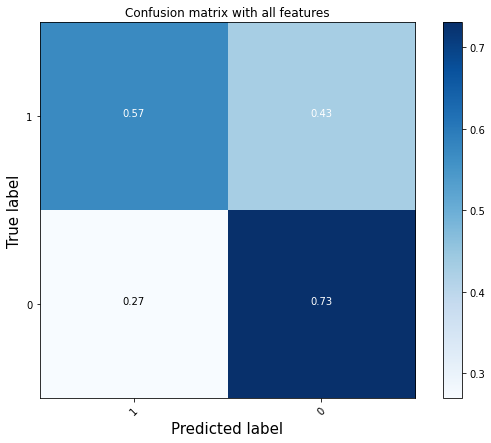

In [95]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize=True,
                      title='Confusion matrix with all features')

# b) Logistic Regression Classifier

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.6809404885179996
Recall: 0.6691029117057645
F1 score: 0.6842676311030741


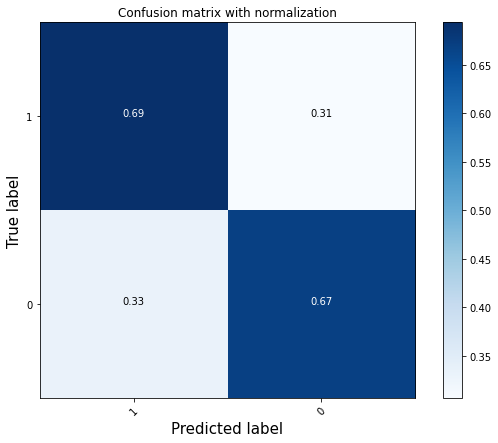

In [96]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluareg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize=True,
                      title='Confusion matrix with normalization')

# c) Support Vector Machine

Accuracy:  0.6666260583541451
Recall: 0.6660379582694801
F1 score: 0.6737017826268407


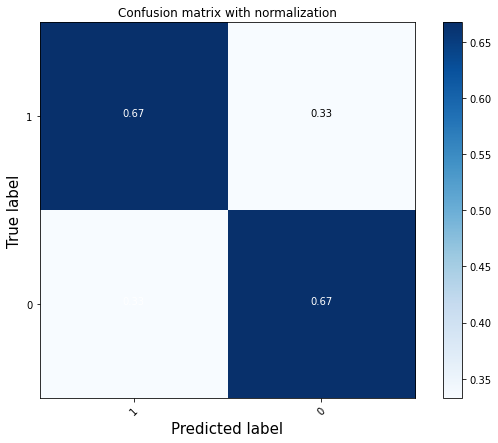

In [97]:
from sklearn.svm import LinearSVC

#vect = CountVectorizer(preprocessor=clean) # Step-1
#X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
#X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize=True,
                      title='Confusion matrix with normalization')

### Possible modifications to improve model performance

a) Trying Bag of words and TF-IDF using n-gram and assessing new model performance

# Naive Bayes Classifier (N-gram)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean, ngram_range=(1,3)) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)


(49249, 550695) (16417, 550695)


In [109]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 68.1 ms, sys: 6.03 ms, total: 74.1 ms
Wall time: 82.7 ms


In [105]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize=True,
                      title='Confusion matrix with all features')

NameError: name 'y_pred_class' is not defined

# Logistic Regression Classifier (N-gram)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.7058536882499847
Recall: 0.6955086643875987
F1 score: 0.7096037043718804


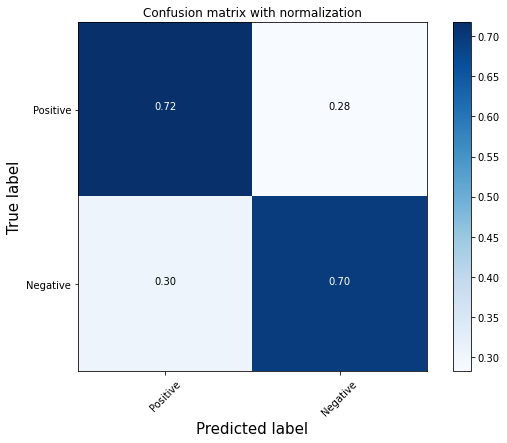

In [111]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize=True,
                      title='Confusion matrix with normalization')

# Support Vector Machines (N-gram)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy:  0.6876408600840592
Recall: 0.671224802546269
F1 score: 0.6895131993218697


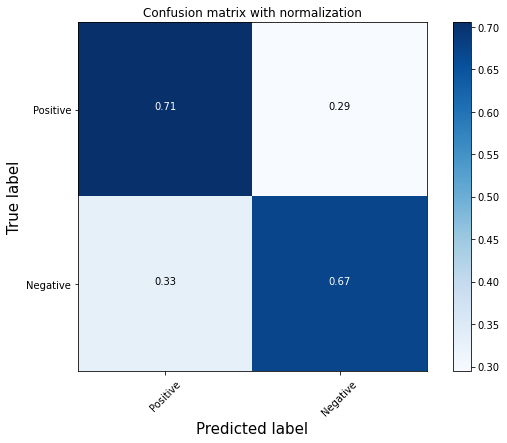

In [112]:
from sklearn.svm import LinearSVC

#vect = CountVectorizer(preprocessor=clean, ngram_range=(1,3)) # Step-1
#X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
#X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize=True,
                      title='Confusion matrix with normalization')

# Naive Bayes Classifier (TF-IDF)

In [113]:
# Step 2-3: Preprocess and Vectorize train and test data
tfidf_vec = TfidfVectorizer(preprocessor=clean,ngram_range = (1, 3)) # instantiate a vectoriezer
X_train_dtm = tfidf_vec.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(49249, 550695) (16417, 550695)


In [114]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 74.4 ms, sys: 12.8 ms, total: 87.2 ms
Wall time: 113 ms


Accuracy:  0.6724127428884693
Recall: 0.7825061888482848
F1 score: 0.7116972231156856


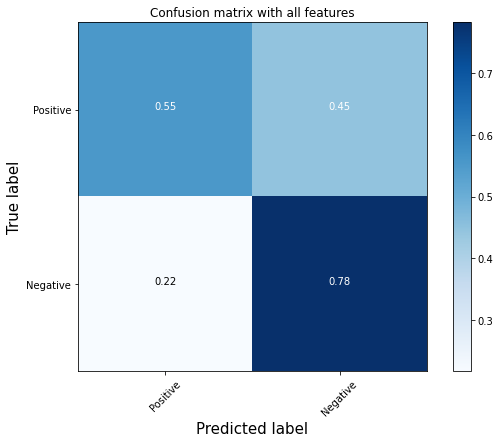

In [115]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize=True,
                      title='Confusion matrix with all features')

# Logistic Regression Classifier (TF-IDF)

Accuracy:  0.668148870073704
Recall: 0.6785335376635624
F1 score: 0.6787735849056603


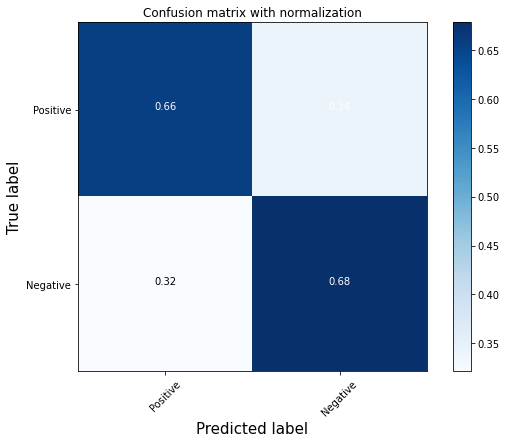

In [116]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize=True,
                      title='Confusion matrix with normalization')

# Support Vector Machine (TF-IDF)

Accuracy:  0.6958031309008954
Recall: 0.7379464811976895
F1 score: 0.7148566860797076


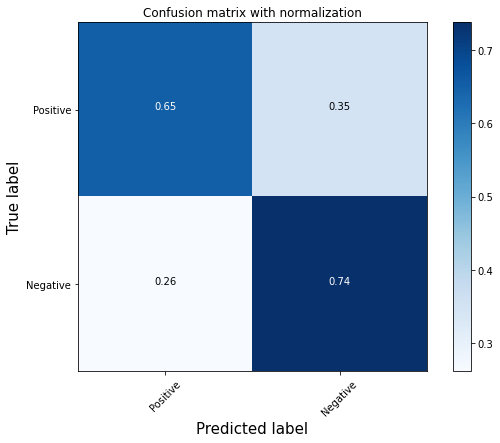

In [117]:
from sklearn.svm import LinearSVC

#tfidf_vec = TfidfVectorizer(preprocessor=clean,ngram_range = (1, 3)) # Step-1
#X_train_dtm = tfidf_vec.fit_transform(X_train) # combined step 2 and 3
#X_test_dtm = tfidf_vec.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize=True,
                      title='Confusion matrix with normalization')

# Bonus Question

In this part, we perform further data analysis to study the relationship between tweet contents and future market trend. 

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [25]:
import keras
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [103]:
def signal(df, market_trend, input_length = 100, Embedding_dimensions = 100):
    df1 = df.copy()
    df1['signal'] = df1[market_trend].apply(lambda x: 1 if x > 0 else 0)
    df1['TWEET'] = df1['TWEET'].apply(lambda x: clean(x))
    X = df1['TWEET'] # the column text contains textual data to extract features from
    y = df1['signal'] # this is the column we are learning to predict. 
    print(X.shape, y.shape)
    # split X and y into training and testing sets. By default, it splits 75% training and 25% test
    # random_state=1 for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    X_data, y_data = np.array(df1['TWEET']), np.array(df1['signal'])
    tokenizer = Tokenizer(filters="", lower=False, oov_token="")
    tokenizer.fit_on_texts(X_data)
    vocab_length = len(tokenizer.word_index.items())
    tokenizer.num_words = vocab_length
    print("Tokenizer vocab length:", vocab_length)
    
    X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
    X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)
    print("X_train.shape:", X_train.shape)
    print("X_test.shape :", X_test.shape)

    tweets = df1['TWEET']
    w2v_model = Word2Vec(tweets, vector_size=100, window=5, min_count=2, workers=16, seed = 34)
    
    embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))
    print(embedding_matrix.shape)
    
    for word, token in tokenizer.word_index.items():
        if w2v_model.wv.__contains__(word):
            embedding_matrix[token-1] = w2v_model.wv.__getitem__(word)

    print("Embedding Matrix Shape:", embedding_matrix.shape)
    
    def getModel():
        embedding_layer = Embedding(input_dim = vocab_length,
                                    output_dim = Embedding_dimensions,
                                    weights=[embedding_matrix],
                                    input_length=input_length,
                                    trainable=False)

        model = Sequential([
            embedding_layer,
            Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
            Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
            Conv1D(100, 5, activation='relu'),
            GlobalMaxPool1D(),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid'),
        ],
        name="Sentiment_Model")
        return model    
    
    training_model = getModel()
    training_model.summary()
    
    callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]
    
    training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
    )
    
    y_pred_class = training_model.predict(X_test)
    y_preds_bin = y_pred_class > 0.5
    # calculate evaluation measures:
    print("Accuracy: ", metrics.accuracy_score(y_test, y_preds_bin))
    print("Recall:",metrics.recall_score(y_test, y_preds_bin))
    print("F1 score:",metrics.f1_score(y_test, y_preds_bin))
    cnf_matrix = confusion_matrix(y_test, y_preds_bin)
    plt.figure(figsize=(8,6))
    plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                          title='Confusion matrix with normalization')
    


(65666,) (65666,)
(49249,) (49249,)
(16417,) (16417,)
Tokenizer vocab length: 63099
X_train.shape: (49249, 100)
X_test.shape : (16417, 100)
(63099, 100)
Embedding Matrix Shape: (63099, 100)
Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          6309900   
                                                                 
 bidirectional_10 (Bidirecti  (None, 100, 200)         160800    
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 100, 200)         240800    
 onal)                                                           
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 100)           100100    
                                                           

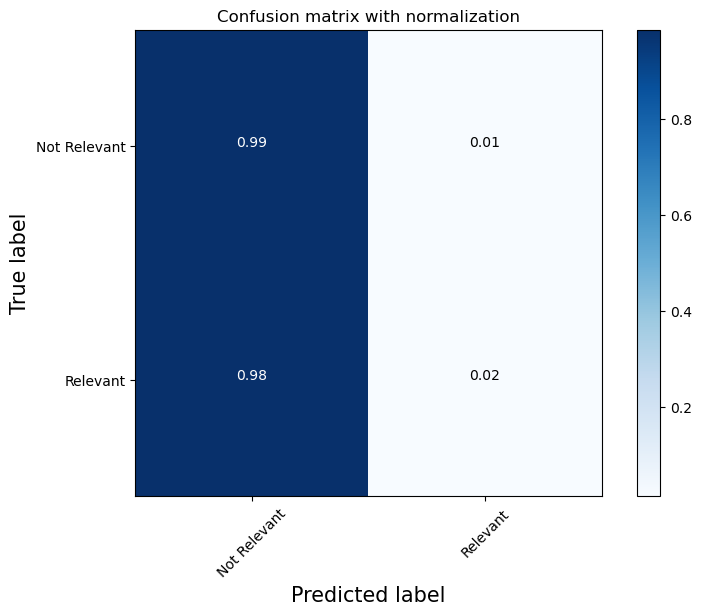

In [109]:
signal(df,'1_DAY_RETURN')

(65666,) (65666,)
(49249,) (49249,)
(16417,) (16417,)
Tokenizer vocab length: 63099
X_train.shape: (49249, 100)
X_test.shape : (16417, 100)
(63099, 100)
Embedding Matrix Shape: (63099, 100)
Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          6309900   
                                                                 
 bidirectional_8 (Bidirectio  (None, 100, 200)         160800    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 100, 200)         240800    
 nal)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 100)           100100    
                                                           

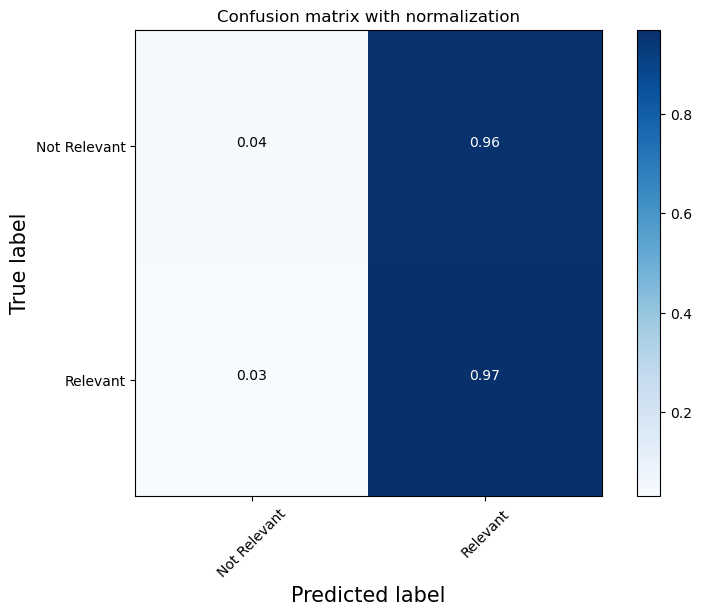

In [108]:
signal(df,'7_DAY_RETURN')

In this part, we apply a convolutional LSTM model to predict the influence of tweets on the companies' market peformance. By selecting the index, we generate a new column called `signal` with binary values which equal 1 when the index is positive while 0 when the index is negative. Also, we apply word embeddings to the tweets to fit in the model. The results do not show high accuracy but provide a medium f-score of 0.7024653561069932. One possible explanation for the low accuracy could be attributed to the tiny effects on the market performance of large companies of individual tweets. In other words, the LSTM model overfits the training data due to a slight relationship between tweets and market performance, and thus generates unsatisfactory outputs in the test dataset.